# ДЗ по "Введение в нейронные сети (Вебинар)"

## Вебинар 2. Keras 
* Домашнее задание:  
  - Нарисуйте сами в Paint цифру пером и подайте на вход вашей нейронной сети, на выходе должна быть цифра от 0 до 9. Для работы с рисунками можно использовать Pillow.
  - Обучите нейронную сеть от SKLEARN и потестируйте.

In [1]:
# Устанавливаем пакеты в окружение, если они не установлены
# !pip install scikeras[tensorflow]
# !pip install numpy
# !pip install matplotlib
# !pip install Pillow

In [2]:
import keras
from keras.datasets import mnist 
from keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image   # Библиотека работы с изображениями

## Обучение и тестирование модели на Keras (последовательная модель Sequential)
см. [ссылка](https://proproprogs.ru/tensorflow/keras-posledovatelnaya-model-sequential)

In [3]:
# Импортиртируем набор данных (для обучения и тестовый) MNIST из модуля Keras (картинки 28х28 пик. и цифры которые соответствуют картинкам) 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Нормализуем данные (все данные в массиве, делим на 255)
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# Преобразовывает вектор класса (целые числа) в двоичную матрицу класса
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [6]:
# Задаем входной формат данных для модели
input_shape = (28, 28, 1)

In [7]:
# Создаем модель Keras - последовательная модель Sequential
model_2 = keras.Sequential([
    keras.Input(shape=input_shape),   # устанавливаем входной формат данных
    Flatten(),                        # сглаживание
    Dense(90, activation = 'relu'),   # Слой нейронной сети из 90 нейронов и функцией активации 'relu'
    Dense(10, activation = 'softmax') # Слой нейронной сети из 10 нейронов и функцией активации 'softmax'
    ])

In [8]:
# Компилируем модель
model_2.compile(optimizer='Adam',          # выбираем оптимизатор
             loss='categorical_crossentropy',  # выбираем функцию потерь
             metrics=['accuracy'])             # выбираем метрику

In [9]:
%%time
# Обучение и сохранение истории обучения с одновременной оценкой на тестовых данных (чтобы удостовериться, что переобучения не произошло)
history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data =(x_test, y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 2s 983us/step - loss: 0.2808 - accuracy: 0.9206 - val_loss: 0.1555 - val_accuracy: 0.9534
Epoch 2/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.1275 - accuracy: 0.9621 - val_loss: 0.1057 - val_accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0894 - accuracy: 0.9729 - val_loss: 0.0947 - val_accuracy: 0.9698
Epoch 4/10
1875/1875 [==============================] - 2s 962us/step - loss: 0.0685 - accuracy: 0.9790 - val_loss: 0.0813 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 2s 929us/step - loss: 0.0540 - accuracy: 0.9835 - val_loss: 0.0813 - val_accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0720 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.0806 - v

### Отрисовка потерь и точности модели (при обучении и на тестовых данных)

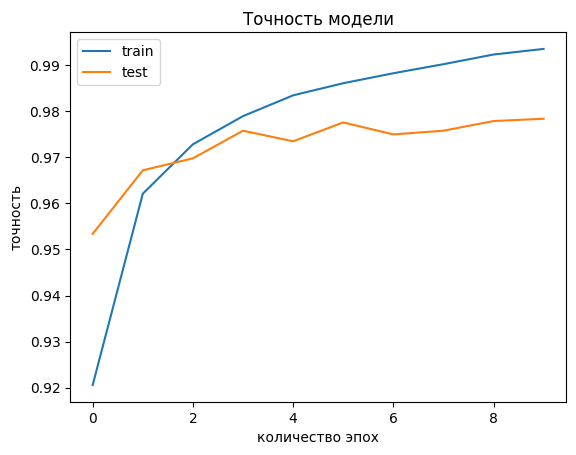

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

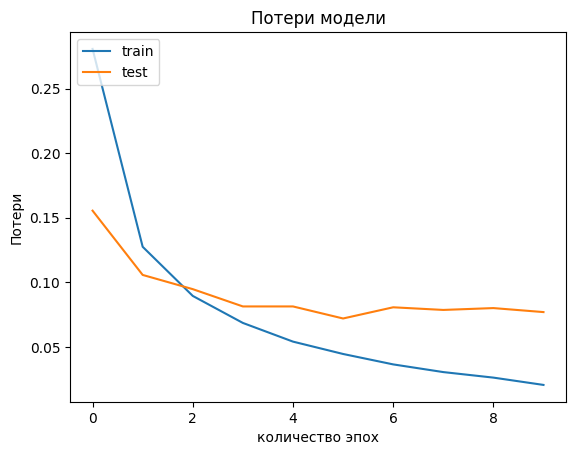

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Распознование своих рукописных цифр

### Работа с рукописнывми цифрами
см. [ссылка](https://fixmypc.ru/post/izmenenie-razmera-kartinki-v-python-s-pillow-pil/#izmenenie-razmera-izobrazheniia-s-resize)

In [12]:
img_array = np.array([])
for i in range(1, 6):
    # Загружаем картинку, переводим изображение в двумерную матрицу, делаем картинку черно-белой и нормализуем её
    img = np.asarray(Image.open(f'img\img_{i}.jpg').convert('L').resize((28, 28)), ) / 255
    # Добавляем картинку в массив
    img_array = np.append(img_array, img) 
else:
    # Задаем размер матрицы (для 5 изображений будет 5, 28, 28)
    img_array = img_array.reshape(i, 28, 28)
    # Делаем прозрачный фон (белый цвет->прозрачный)
    img_array[img_array > 0.9 ] = 0

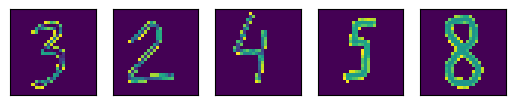

In [13]:
# Выведем собственные рукописные цыфры
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(img_array[i])
    # Убираем подписи к осям рисунков
    plt.xticks([])
    plt.yticks([])
plt.show()


### Предсказание рукописных цифр
метод [predict](https://keras.io/api/models/model_training_apis/#predict-method)

In [14]:
# Предсказываем 5-ть рукописных цыфр
predictions = model_2.predict(img_array[:5])

# Выведем результат предсказания
print(f'Predictions: {np.argmax(predictions, axis=1)}')

1/1 [==============================] - 0s 43ms/step
Predictions: [3 2 4 5 8]


### Сохранение и загрузка модели предсказания

In [15]:
# Сохраняем модель
model_2.save('predict_uc20100')

INFO:tensorflow:Assets written to: predict_uc20100\assets


INFO:tensorflow:Assets written to: predict_uc20100\assets


In [16]:
# Проверим как работает загрузка модели
model_loaded = keras.models.load_model('predict_uc20100')

In [17]:
# Оцениваем работу загруженной модели на тестовых данных
results = model_loaded.evaluate(x_test, y_test_cat)
print('test loss, test acc:', results)

313/313 [==============================] - 0s 706us/step - loss: 0.0769 - accuracy: 0.9784
test loss, test acc: [0.07691574841737747, 0.9783999919891357]


In [18]:
# Повторно предскажем наши рукописные цыфры для загруженной модели
predictions = model_loaded.predict(img_array[:5])
print(f'Predictions: {np.argmax(predictions, axis=1)}')

1/1 [==============================] - 0s 34ms/step
Predictions: [3 2 4 5 8]


In [19]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


## Вывод: Веса на входы нейронов подбираются каждый раз рандомно при запуске notebook, соответственно графики и сама модель будет отличаться. Количество нейронов и эпох тоже надо подбирать экспериментально. Выполнив данное ДЗ я на практике увидел как это все работает и даже создал собственную НС которая смогла распознать мои рукописные цифры.